# Task!

1. ให้นิสิตส่งไฟล์ 6530182121_inclass_regression.ipynb และ Google Colab link ใน MyCourseVille (แทน 6530182121 ด้วยรหัสประจำตัวของนิสิต) ที่รันบนชุดข้อมูล house-price prediction ดังแสดงไว้ Session Lab ในห้องเรียน

             !wget -N https://www.dropbox.com/s/h0wwe6pnik5pzwk/housing.csv


2. ให้นิสิตสร้าง Text Box ลงในไฟล์ Jupyter Notebook ใน Cell ล่างสุด ในไฟล์ข้อที่ 1 และให้เขียนรายงานผลลัพธ์ดังนี้
    2.1 เขียนรายงาน ตัวแปร 3 ตัว ที่ถูกเลือกโดยตัวแปรดังกล่าวต้องมีความสัมพันธ์กับตัวแปร Target (ใช้เกณฑ์ค่า Correlation เป็นตัวตัดสิน)
    2.2 เขียนสมการ Multiple Regression
    2.3 เขียนรายงานค่า RMSE และ R-square ที่ถูกวัดบน Test Set

- Task!
- Library
- Read Data and explore them
- Variable selection
- Train Data
Interception and Slope
My Equations:
ANOVA TABLE
RMSE, Average, R - squared
- Result
- Residual Plot Analysis

# Library

In [ ]:
## Import libraries ,which necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

# Read Data and explore them

In [ ]:
## Download Data housing.csv into my colab
!wget -N https://www.dropbox.com/s/h0wwe6pnik5pzwk/housing.csv

--2024-09-13 15:16:39--  https://www.dropbox.com/s/h0wwe6pnik5pzwk/housing.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/5lpkz9mmzf69b5fqs0hl7/housing.csv?rlkey=akmu58ne7lp6t6xpb81s76flt [following]
--2024-09-13 15:16:40--  https://www.dropbox.com/scl/fi/5lpkz9mmzf69b5fqs0hl7/housing.csv?rlkey=akmu58ne7lp6t6xpb81s76flt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc441d1cbac581e0f7191b119c70.dl.dropboxusercontent.com/cd/0/inline/Caju0LDzP36kOj3MJZU_FbqLBczNCiKKWtBnzgIyxrIqxSrvycQQ0gmvpVTzL4ABtUsB-toC_JpIcyQB7LDEIHCsaeO4Q_RGXMBRn3UnptM7g6iBrTZNfrYxOxJZ9mr4C4U/file# [following]
--2024-09-13 15:16:40--  https://uc441d1cbac581e0f7191b119c70.dl.dropboxusercontent.com/cd/0/inline/Caju0LDzP36kOj3MJZU_FbqLB

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per dollar 10,000.

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000's

In [ ]:
# Read data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# dimension
df.shape

(506, 14)

In [ ]:
# correlation
pd.set_option("display.precision", 2)
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


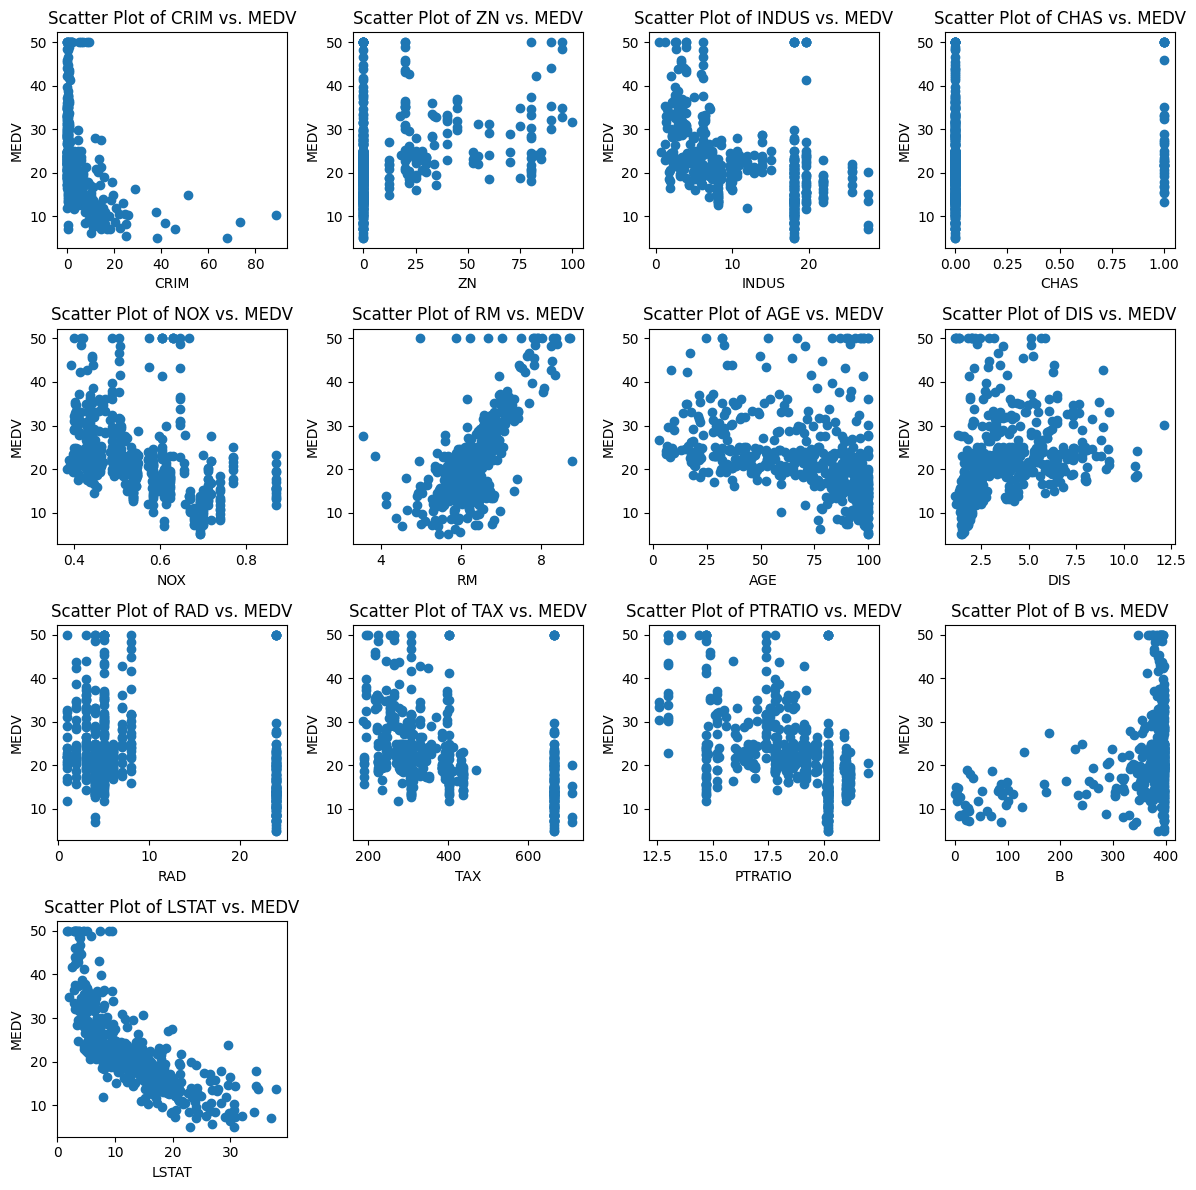

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows and columns for subplots
num_cols = 4  # Adjust as needed
num_rows = int(np.ceil((len(df.columns) - 1) / num_cols))

# Define the desired width and height for each subplot
subplot_width = 3
subplot_height = 3

# Calculate the overall figure size based on subplot dimensions and number of rows/columns
figsize = (subplot_width * num_cols, subplot_height * num_rows)

# Create a figure and axes for subplots with the calculated figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate and plot
i = 0
for col in df.columns:
    if col != 'MEDV':
        axes[i].scatter(df[col], df["MEDV"])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('MEDV')
        axes[i].set_title(f'Scatter Plot of {col} vs. MEDV')
        i += 1

# Hide any unused subplots
for j in range(i, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping (optional, might still be helpful)
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Correlation with output variable
cor = df.corr()
cor_target = abs(cor["MEDV"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5] # Select variable which | correlation | > 0.5
relevant_features

,MEDV
RM,0.70
PTRATIO,0.51
LSTAT,0.74
MEDV,1.00


In [ ]:
cor_target

,MEDV
CRIM,0.39
ZN,0.36
INDUS,0.48
CHAS,0.18
NOX,0.43
RM,0.70
AGE,0.38
DIS,0.25
RAD,0.38
TAX,0.47


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
[ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074  1.10481082]


<Axes: xlabel='MEDV', ylabel='Count'>

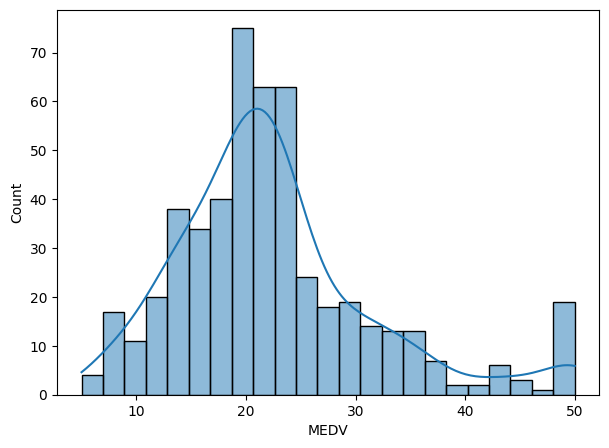

In [ ]:
from scipy import stats
#histogram and normal probability plot
print( df.columns )
print( stats.skew(df) )

sns.histplot(df['MEDV'], kde=True)

# Variable selection

Choose y = f(RM, PTRATIO, LSTAT)

In [ ]:
x = df.drop(columns=['MEDV'])
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33


In [ ]:
# variable selection
X = df.drop(columns=['MEDV'])
selection_var = X[['RM', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

print(selection_var.shape)
print(y.shape)

(506, 3)
(506,)


# Train Data

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
test_sizing = 0.33
x_train, x_test, y_train, y_test = train_test_split(selection_var, y, test_size = test_sizing, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train, y_train)

## Interception and Slope

In [ ]:
model.intercept_ #22.929119574306025

22.929119574306025

In [ ]:
print(selection_var.columns)
model.coef_

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')


array([ 4.21798734, -1.07042016, -0.57236016])

### My Equations:

$$
MEDV = 4.21798 * RM - 1.07042 * PTRATIO - 0.57236 * LSTAT
$$


## ANOVA TABLE

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Define the formula for your model
# Assuming your target variable is 'MEDV' and predictors are 'RM', 'PTRATIO', and 'LSTAT'
formula = 'MEDV ~ RM + PTRATIO + LSTAT'

# Fit the model using statsmodels formula API
model_smf = smf.ols(formula, data=df).fit()  # Use the original DataFrame 'df'

# Get the ANOVA table
anova_table = sm.stats.anova_lm(model_smf, typ=2)

# Print the ANOVA table
print(anova_table.round(3))

            sum_sq     df       F  PR(>F)
RM         3074.27    1.0  112.42     0.0
PTRATIO    1711.32    1.0   62.58     0.0
LSTAT      5013.64    1.0  183.34     0.0
Residual  13727.99  502.0     NaN     NaN


Because p - value for predicted variable is (approximated) zero and less than sigicant level, This regression model is **useful** to predict y.

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
226,37.6,36.42
292,27.9,27.65
90,22.6,25.90
373,13.8,2.10
273,35.2,31.69


## RMSE, Average, R - squared

In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print( "RMSE = ", round(math.sqrt(mse),2) )
print( "Average house price =", round(y_test.mean(),2) )

# R^2
print( "R^2 = ", round(model.score(x_test, y_test),2) )

RMSE =  5.81
Average house price = 22.52
R^2 =  0.64


### Result

- RMSE = 5.81

Avg house price = $22.52K

R - squared = 0.64


## Residual Plot Analysis

In [ ]:
df2 = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
residuals = df2["Actual"] - df2["Predict"]

In [ ]:
residuals.head()

,0
226,1.18
292,0.25
90,-3.30
373,11.70
273,3.51


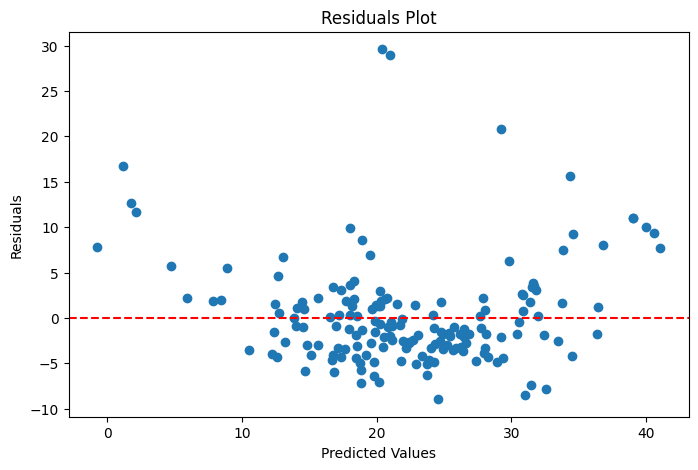

In [ ]:
# Create the residuals plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

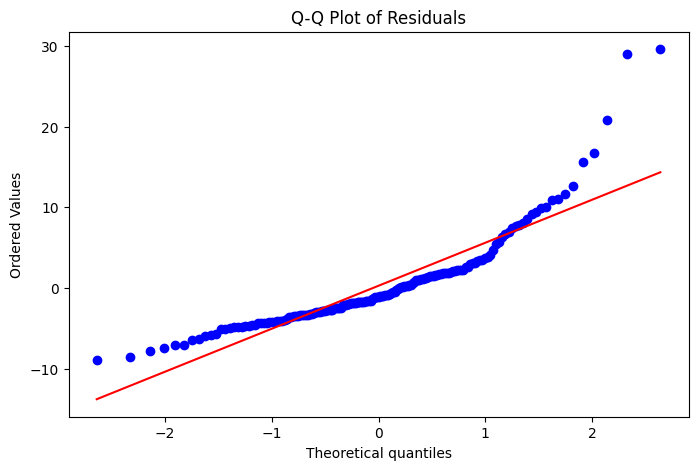

In [ ]:
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()